In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Bài 9.1 
(Nguyên cứu về vai trò của phụ nữ trong xã hội). Trong một điều tra xã hội thực hiện vào năm 1971-1972, các nhà nghiên cứu hỏi đối tượng, nam và nữ, đồng ý hay không đồng ý với câu hỏi sau đây:  
> "Phụ nữ nên lo việc nhà và để việc điều hành nhà nước cho đàn ông"  
(Harberman SJ. The analysis of residuals in cross-classified tables. Biometrics 1973;29;205-220)

Các nhà nghiên cứu ghi nhận trình độ học vấn và giới của mỗi đối tượng. Kết quả nghiên cứu có thể tóm lượt bằng bảng số liệu sau đây:

In [2]:
male_edu = [i for i in range (21)]
male_sex = ["Male"] * 21
male_agree = [4, 2, 4, 6, 5, 13, 25, 27, 75, 29, 32, 36, 115, 31, 28, 9, 15, 3, 1, 2, 3]
male_disagree = [2, 0, 0, 3, 5, 7, 9, 15, 49, 29, 45, 59, 245, 70, 79, 23, 110, 29, 28, 13, 20]

female_edu = [i for i in range (21)]
female_sex = ["Female"] * 21
female_agree = [4, 1, 0, 6, 10, 14, 17, 26, 91, 30, 55, 50, 190, 17, 18, 7, 13, 3, 0, 1, 2]
female_disagree = [2, 0, 0, 1, 0, 7, 5, 16, 36, 35, 67, 62, 403, 92, 81, 34, 115, 28, 21, 2, 4]

df_male = pd.DataFrame.from_dict({"edu": male_edu, "sex": male_sex, "agree": male_agree, "disagree": male_disagree})
df_female = pd.DataFrame.from_dict({"edu": female_edu, "sex": female_sex, "agree": female_agree, "disagree": female_disagree})

In [3]:
df_male

,edu,sex,agree,disagree
0,0,Male,4,2
1,1,Male,2,0
2,2,Male,4,0
3,3,Male,6,3
4,4,Male,5,5
5,5,Male,13,7
6,6,Male,25,9
7,7,Male,27,15
8,8,Male,75,49
9,9,Male,29,29


In [4]:
df_female

,edu,sex,agree,disagree
0,0,Female,4,2
1,1,Female,1,0
2,2,Female,0,0
3,3,Female,6,1
4,4,Female,10,0
5,5,Female,14,7
6,6,Female,17,5
7,7,Female,26,16
8,8,Female,91,36
9,9,Female,30,35


Biến <strong>edu</strong> là trình độ học vấn (đo bằng số năm học) của người trả lời, <strong>agree</strong> và <strong>disagree</strong> là số đối tượng đồng ý hay không đồng ý với câu hỏi. Hãy phân tích tỉ lệ đồng ý theo trình độ học vấn và giới tính?

## Trả lời: 
Gọi biến <strong><em>result</em></strong> là kết quả lấy ý kiến. Nếu số người <strong>agree</strong> lớn hơn số người <strong>disagree</strong> thì <em>result</em> bằng 1, ngược lại thì bằng 0.

In [5]:
df_male['result'] = (df_male['agree'] > df_male['disagree']).astype('int')
df_male

,edu,sex,agree,disagree,result
0,0,Male,4,2,1
1,1,Male,2,0,1
2,2,Male,4,0,1
3,3,Male,6,3,1
4,4,Male,5,5,0
5,5,Male,13,7,1
6,6,Male,25,9,1
7,7,Male,27,15,1
8,8,Male,75,49,1
9,9,Male,29,29,0


In [6]:
df_female['result'] = (df_female['agree'] > df_female['disagree']).astype('int')
df_female

,edu,sex,agree,disagree,result
0,0,Female,4,2,1
1,1,Female,1,0,1
2,2,Female,0,0,0
3,3,Female,6,1,1
4,4,Female,10,0,1
5,5,Female,14,7,1
6,6,Female,17,5,1
7,7,Female,26,16,1
8,8,Female,91,36,1
9,9,Female,30,35,0


## a). Với giới tính Male

In [7]:
log_reg_male = smf.logit("result ~ edu", data=df_male).fit()
print(log_reg_male.summary())

Optimization terminated successfully.
         Current function value: 0.242568
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                   21
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.6350
Time:                        10:09:46   Log-Likelihood:                -5.0939
converged:                       True   LL-Null:                       -13.955
Covariance Type:            nonrobust   LLR p-value:                 2.556e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7709      2.342      2.037      0.042       0.180       9.362
edu           -0.6369      0.

<ul>
    <li>Ta thấy trình độ học vấn càng cao thì khả năng không đồng ý với quan điểm trên càng lớn.</li>
    <li>Biến <strong>edu</strong> có ý nghĩa về mặt thống kê (p-value = 0.029).</li>
    <li>Mô hình giải thích được 63.5% sự thay đổi của biến <strong>result</strong>.</li>
    <li>Trực quan hàm xác suất như sau:</li>
</ul>

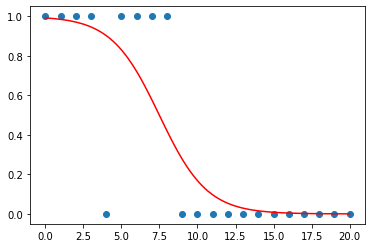

In [8]:
pred_input = np.linspace(df_male['edu'].min(),df_male['edu'].max(),100)
predictions = 1 / (1 + np.exp(-4.7709 + 0.6369*pred_input))
plt.scatter(df_male['edu'],df_male['result'])
plt.plot(pred_input,predictions,c='red')
plt.show()

## b). Với giới tính Female

In [9]:
log_reg_female = smf.logit("result ~ edu", data=df_female).fit()
print(log_reg_female.summary())

Optimization terminated successfully.
         Current function value: 0.296603
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                   21
Model:                          Logit   Df Residuals:                       19
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jul 2022   Pseudo R-squ.:                  0.5537
Time:                        10:09:46   Log-Likelihood:                -6.2287
converged:                       True   LL-Null:                       -13.955
Covariance Type:            nonrobust   LLR p-value:                 8.459e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8086      1.820      2.093      0.036       0.242       7.375
edu           -0.5099      0.

<ul>
    <li>Ta thấy trình độ học vấn càng cao thì khả năng không đồng ý với quan điểm trên càng lớn.</li>
    <li>Biến <strong>edu</strong> có ý nghĩa về mặt thống kê (p-value = 0.020).</li>
    <li>Mô hình giải thích được 55.37% sự thay đổi của biến <strong>result</strong>.</li>
    <li>Trực quan hàm xác suất như sau:</li>
</ul>

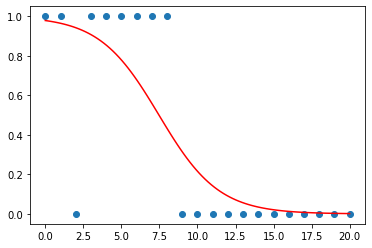

In [10]:
pred_input = np.linspace(df_female['edu'].min(),df_female['edu'].max(),100)
predictions = 1 / (1 + np.exp(-3.8086 + 0.5099*pred_input))
plt.scatter(df_female['edu'],df_female['result'])
plt.plot(pred_input,predictions,c='red')
plt.show()